In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
import random
import numpy as np

In [15]:
def gradient_regression(X, y, alpha, b, w):
    dw1 = 0.0; dw2 = 0.0; db = 0.0              
    for i in range(len(X[0])):      
        aux = -2.0*(y[i]-(w[0]*X[0][i]+w[1]*X[1][i]+b))
        db = db + aux                 
        dw1 = dw1 + X[0][i]*aux       
        dw2 = dw2 + X[1][i]*aux       
    aux = 1.0/float(len(X[0]))
    b = b - aux*db*alpha
    w[0] = w[0] - aux*dw1*alpha
    w[1] = w[1] - aux*dw2*alpha
    return b,w

In [16]:
def gradient_regression2(X, y, alpha, b, w):
    aux = -2*(y-(w*X+b)).sum()
    b = b - alpha*aux/float(len(X[0]))
    w = w - alpha*aux/float(len(X[0])) 
    return b,w

In [17]:
def normalize(x):               
    mean = np.mean(x)
    sdeviation = np.std(x)
    y = (x-mean)/sdeviation
    return y

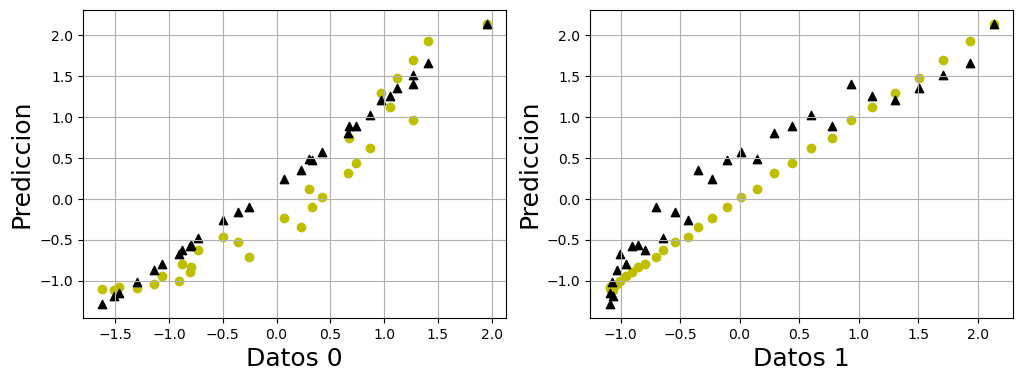

In [18]:
np.random.seed(10)
# Creando los ejemplos
X = [[],[]]
y = []
result = []
for i in range(30):
    X[0].append(i+random.random()*5)
    X[1].append(i**2+random.random()*5)
    y.append((X[0][i]+20 + random.random()*10)+(X[1][i]-10 + random.random()*10))
    #y.append((i**2+random.random()+50))

X[0] = normalize(X[0])
X[1] = normalize(X[1])
y = normalize(y)

alpha = 0.1
b = random.random()
w = np.random.rand(2,1);
w = np.array(w)
epochs = 4

for e in range(epochs): 
    b, w = gradient_regression(X, y, alpha, b, w)

result = w.T@X+b

fig, axs = plt.subplots(1,2, figsize=(12,4))              

for i in [0,1]:
    axs[i].scatter(X[i], y, c='y', marker='o')
    axs[i].scatter(X[i], result, c='k', marker='^')
    axs[i].set_xlabel('Datos ' + str(i), fontsize=18)
    axs[i].set_ylabel('Prediccion', fontsize=18)
    axs[i].grid(); 
plt.show()